Create a GPU instance from the "Edit->Notebook Settings->GPU" menu


Download the SVHN dataset both train and test sets

In [1]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

--2020-07-17 08:46:03--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  10.4MB/s    in 16s     

2020-07-17 08:46:19 (11.1 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [2]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-07-17 08:46:22--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  11.5MB/s    in 6.4s    

2020-07-17 08:46:29 (9.58 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



Load the train and test sets:

In [3]:
from scipy import io
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train = io.loadmat('train_32x32.mat')
test = io.loadmat('test_32x32.mat')

Display a sample image with the label

Digit Label: 5


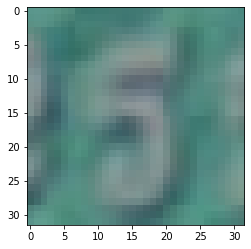

In [5]:
index =  np.random.randint(0,len(train['y']))
print("Digit Label: " + str(train['y'][index][0]))
plt.imshow(train['X'][:,:,:,index])

Digit "0" has the label 10, so replace all "10" labels with "0"

For sanity view a section of the arrays with a 10 in them

In [6]:
train["y"][100:120,0]

array([ 2,  4,  4,  6,  8,  1,  7,  1, 10,  3,  9,  1,  3,  5,  9,  3,  1,
        1,  1,  1], dtype=uint8)

In [7]:
test["y"][0:20,0]

array([ 5,  2,  1, 10,  6,  1,  9,  1,  1,  8,  3,  6,  5,  1,  4,  4,  1,
        6,  3,  4], dtype=uint8)

Do the conversion for the train and test sets

In [8]:
train["y"][:,0][train["y"][:,0]==10] = 0
test["y"][:,0][test["y"][:,0]==10] = 0

For sanity view the same section to check the arrays have 0s where there were 10s 

In [9]:
train["y"][100:120,0]

array([2, 4, 4, 6, 8, 1, 7, 1, 0, 3, 9, 1, 3, 5, 9, 3, 1, 1, 1, 1],
      dtype=uint8)

In [10]:
test["y"][0:20,0]

array([5, 2, 1, 0, 6, 1, 9, 1, 1, 8, 3, 6, 5, 1, 4, 4, 1, 6, 3, 4],
      dtype=uint8)

Import the COCO dataset from amazon S3

In [11]:
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess

In [12]:
files = ['val2017.zip', 'annotations_trainval2017.zip', 'train2017.zip']
s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))

In [13]:
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", file_name])
    print("Finished unzipping", file_name)

In [14]:
num_cpus = multiprocessing.cpu_count()

In [15]:
with multiprocessing.Pool(num_cpus) as proc:
  proc.map(download_and_unzip_from_s3, files)

Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished downloading val2017.zip . Starting to unzip.
Finished unzipping annotations_trainval2017.zip
Finished unzipping val2017.zip
Finished downloading train2017.zip . Starting to unzip.
Finished unzipping train2017.zip


In [16]:
import json

Have a look at the JSON structure

In [17]:
image = {}
with open("annotations/person_keypoints_train2017.json") as keypoints:
  kp = json.load(keypoints)
  num = 1
  for i,a in zip(kp['images'],kp['annotations']):
    print(i.keys())
    print(a.keys())
    num = num - 1
    if num == 0:
      break

dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id'])


Sanity check that all is working using the COCO API



In [22]:
from pycocotools.coco import COCO
import skimage.io as io

In [23]:
annotation_file = "annotations/instances_val2017.json"
coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.46s)
creating index...
index created!


In [24]:
categories = coco.loadCats(coco.getCatIds())

In [25]:
print(categories)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'name': 'cat'}, {'supercategory': 'animal', 'id': 18, 'name': 'dog'}, {'supercategory

In [27]:
cat_ids = coco.getCatIds(catNms=['person'])
img_ids = coco.getImgIds(catIds=cat_ids)

image ID: 194471
filename: 000000194471.jpg


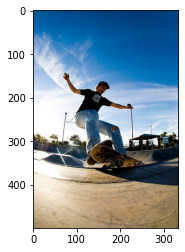

In [37]:
#index = np.random.randint(0,len(img_ids))
#img_id = img_ids[index]
img_id = 194471
print("image ID: {}".format(img_id))
print("filename: {}".format(coco.imgs[img_id]['file_name']))
img = io.imread('val2017/' + coco.imgs[img_id]['file_name'])
plt.imshow(img)

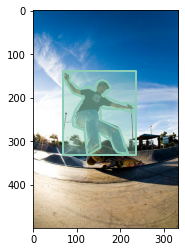

In [38]:
plt.imshow(img)
ann_ids = coco.getAnnIds(imgIds=img_id, catIds=cat_ids)
annotations = coco.loadAnns(ann_ids)
coco.showAnns(annotations, draw_bbox=True)

Now get the list of keypoints for this image from the JSON file

In [39]:
with open("annotations/person_keypoints_val2017.json") as keypoints:
  kp = json.load(keypoints)
      

In [42]:
keypoints = []
bbox = []
filename = "val2017/"
num_kp = 0
for i in kp['images']:
  if int(i["id"]) == img_id:
     print(i["id"])
     filename += i['file_name']

for a in kp['annotations']:
  if int(a["image_id"]) == img_id:
     keypoints = a["keypoints"]
     bbox = a["bbox"]
     
     num_kp = a["num_keypoints"]

print(filename)
print(num_kp)
print(keypoints)
print(bbox)

194471
val2017/000000194471.jpg
16
[162, 181, 2, 166, 182, 2, 160, 177, 2, 0, 0, 0, 149, 175, 2, 164, 207, 2, 124, 188, 2, 189, 218, 2, 95, 185, 2, 217, 225, 2, 78, 158, 2, 136, 253, 2, 107, 245, 2, 191, 272, 2, 142, 237, 2, 211, 339, 1, 137, 322, 2]
[68.12, 138.19, 167.07, 194.59]


Show the image with matplotlib:

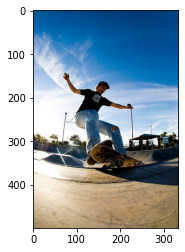

In [43]:
img = io.imread(filename)
plt.imshow(img)

Draw a bounding box using bbox details

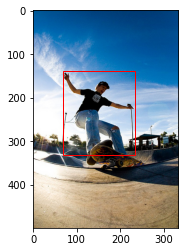

In [45]:
from matplotlib import patches
x_min, y_min, width, height = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
figure, ax = plt.subplots(1)
rect = patches.Rectangle((x_min, y_min), width, height, edgecolor='r', fill=False)
ax.imshow(img)
ax.add_patch(rect)

Convert the keypoints to a List of tuples for itteration

In [46]:
kp_raw = []
index = 1
k = []
for item in keypoints:
  if index % 3 == 0:
      #k.append(item)
      if sum(k) > 0:
          kp_raw.append(tuple(k))
      k=[]
  else:
      k.append(item)
  index += 1
print(keypoints)
print(kp_raw)

[162, 181, 2, 166, 182, 2, 160, 177, 2, 0, 0, 0, 149, 175, 2, 164, 207, 2, 124, 188, 2, 189, 218, 2, 95, 185, 2, 217, 225, 2, 78, 158, 2, 136, 253, 2, 107, 245, 2, 191, 272, 2, 142, 237, 2, 211, 339, 1, 137, 322, 2]
[(162, 181), (166, 182), (160, 177), (149, 175), (164, 207), (124, 188), (189, 218), (95, 185), (217, 225), (78, 158), (136, 253), (107, 245), (191, 272), (142, 237), (211, 339), (137, 322)]


Show the image with bbox and keypoints

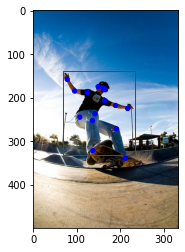

In [47]:
from matplotlib import patches
figure, ax = plt.subplots(1)
ax.imshow(img)
rect = patches.Rectangle((x_min, y_min), width, height, edgecolor='r', fill=False)
ax.add_patch(rect)
for k in kp_raw:
    dot = patches.Circle((k[0], k[1]), radius=5, color='blue')
    ax.add_patch(dot)
